# Notebook Description
This notebook provides the analysis of methylation clustering, Differential Methylation (DM) and Differential Methylation Locations (DMLs)

In [100]:
#Check and Set working location
!pwd

/Users/hputnam/Desktop/Methylation_Junk


In [101]:
#Allow IPython to work with matplotlib figures
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Install IRkernal package for jupyter notebook to talk to R
* Replaces previous call ```load_ext rpy2.ipython```

In [103]:
%load_ext rpy2.ipython

In [104]:
# Install IRkernel package 
#%R install.packages(c('repr', 'IRdisplay', 'crayon', 'pbdZMQ', 'devtools'))
#%R devtools::install_github('IRkernel/IRkernel')
#%R IRkernel::installspec()  # to register the kernel in the current R installation

# Install necessary R packages and load libraries

In [108]:
%%R
#UNCOMMENT IF YOU NEED TO INSTALL PACKAGES
# dependencies
#install.packages( c("data.table","devtools"))
#source("http://bioconductor.org/biocLite.R")
#biocLite(c("GenomicRanges","IRanges"))

# install the development version from github
library(devtools)
install_github("al2na/methylKit",build_vignettes=FALSE)

/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Skipping install of 'methylKit' from a github remote, the SHA1 (a57b85a9) has not changed since last install.
  Use `force = TRUE` to force installation

  warnings.warn(x, RRuntimeWarning)


In [109]:
%%R
#Load Library methylKit
library(methylKit)

# Identify files for analysis

In [110]:
%%R file.list <- list 
('mkfmt_zr1394_1_10K.txt',
'mkfmt_zr1394_2_10K.txt',
'mkfmt_zr1394_3_10K.txt',
'mkfmt_zr1394_4_10K.txt',
'mkfmt_zr1394_5_10K.txt',
'mkfmt_zr1394_6_10K.txt',
'mkfmt_zr1394_7_10K.txt',
'mkfmt_zr1394_8_10K.txt',
'mkfmt_zr1394_9_10K.txt',
'mkfmt_zr1394_10_10K.txt',
'mkfmt_zr1394_11_10K.txt',
'mkfmt_zr1394_12_10K.txt',
'mkfmt_zr1394_13_10K.txt',
'mkfmt_zr1394_14_10K.txt',
'mkfmt_zr1394_15_10K.txt',
'mkfmt_zr1394_16_10K.txt',
'mkfmt_zr1394_17_10K.txt',
'mkfmt_zr1394_18_10K.txt')

In [111]:
%%R sample.id <- list
("hc1_2B",
 "hc1_4B",
 "hc2_15B",
 "hc2_17",
 "hc3_1",
 "hc3_5",
 "hc3_7",
 "hc3_10",
 "hc3_11",
 "ss2_9B",
 "ss2_14B",
 "ss2_18B",
 "ss3_3B",
 "ss3_14B",
 "ss3_15B",
 "ss3_16B",
 "ss3_20",
 "ss5_18")

In [112]:
%R treatment <- c(0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.])

In [113]:
#merges the sample name with the sample files and treatment.
%R myobj=read(file.list,sample.id,assembly="10K",treatment=treatment)

R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x10754d988 / R:0x1198d7650>
[ListV..., ListV..., ListV..., ..., ListV..., ListV..., ListV...]
R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x10754d988 / R:0x1198d7650>
[ListV..., ListV..., ListV..., ..., ListV..., ListV..., ListV...]
R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x10754d988 / R:0x1198d7650>
[ListV..., ListV..., ListV..., ..., ListV..., ListV..., ListV...]
R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x10754d988 / R:0x1198d7650>
[ListV..., ListV..., ListV..., ..., ListV..., ListV..., ListV...]
  ...
R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x10754d988 / R:0x1198d7650>
[ListV..., ListV..., ListV..., ..., ListV..., ListV..., ListV...]
R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x10754d988 / R:0x1198d7650>
[ListV..., ListV..., ListV..., ..., ListV..., 

In [133]:
%R myobj[[2]]

R object with classes: ('methylRaw',) mapped to:
<ListVector - Python:0x118b49308 / R:0x11fcdfa88>
[Facto..., IntVe..., IntVe..., ..., IntVe..., Float..., Float...]
  chr: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('factor',) mapped to:
<FactorVector - Python:0x118b62488 / R:0x12d2f2000>
[       1,        1,        1, ...,     6755,     6755,     6755]
  start: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x108ab1e48 / R:0x12d259000>
[    5197,     5309,     5322, ...,     4614,     4737,     4867]
  end: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x10520e508 / R:0x12d259000>
[    5197,     5309,     5322, ...,     4614,     4737,     4867]
  ...
  chr: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x118b64708 / R:0x108a17000>
[      23,       74,       68, ..., 

In [135]:
%R getMethylationStats(myobj[[1]], plot = F, both.strands = F)

methylation statistics per base
summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   73.91   86.36   80.72   93.75  100.00 
percentiles:
       0%       10%       20%       30%       40%       50%       60%       70% 
  0.00000  56.00000  70.00000  77.54273  82.35294  86.36364  90.00000  92.30769 
      80%       90%       95%       99%     99.5%     99.9%      100% 
 95.23810 100.00000 100.00000 100.00000 100.00000 100.00000 100.00000 



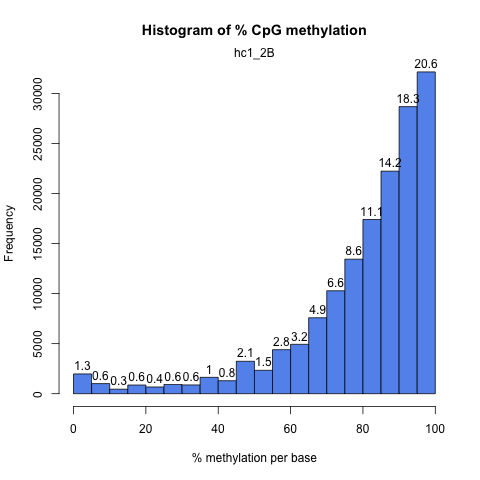

In [134]:
%R getMethylationStats(myobj[[1]], plot = T, both.strands = F)

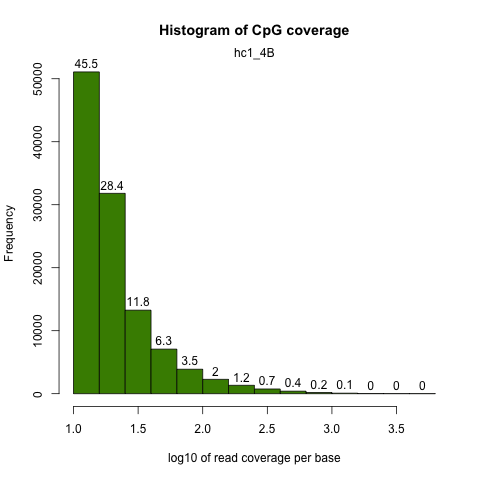

In [136]:
%%R
library("graphics")
getCoverageStats(myobj[[2]], plot = T, both.strands = F)

In [114]:
#unites methylRawList and methylRawListDB objects that only bases with coverage from all samples are retained 
#generates percent methylation matrix
%R meth<-unite(myobj)

R object with classes: ('methylBase',) mapped to:
<ListVector - Python:0x118b5f248 / R:0x10623ccf0>
[Facto..., IntVe..., IntVe..., ..., IntVe..., Float..., Float...]
  chr: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('factor',) mapped to:
<FactorVector - Python:0x108ab2148 / R:0x12e466800>
[       1,        1,        1, ...,     2597,     2597,     2597]
  start: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x108ab2ac8 / R:0x12f415800>
[    5197,     5309,     5322, ...,     4792,     4800,     4805]
  end: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x108ab2fc8 / R:0x12e449000>
[    5197,     5309,     5322, ...,     4792,     4800,     4805]
  ...
  chr: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x108ab4648 / R:0x12bdb0600>
[      21,      103,       96, ...,

In [137]:
%R head(meth)

R object with classes: ('methylBase',) mapped to:
<ListVector - Python:0x118b5e7c8 / R:0x11a804610>
[Facto..., IntVe..., IntVe..., ..., IntVe..., Float..., Float...]
  chr: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('factor',) mapped to:
<FactorVector - Python:0x105215e88 / R:0x140b2c758>
[       1,        1,        1,        1,        2,        2]
  start: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x105215f88 / R:0x140b2b898>
[    5197,     5309,     5322,     5345,      886,      902]
  end: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x1052152c8 / R:0x140b2b970>
[    5197,     5309,     5322,     5345,      886,      902]
  ...
  chr: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x118b64288 / R:0x140ac9ae0>
[      21,      103,       96,       88,       28,

           hc1_2B    hc1_4B   hc2_15B    hc2_17     hc3_1     hc3_5     hc3_7
hc1_2B  1.0000000 0.7898261 0.8089147 0.8226426 0.8026724 0.8171567 0.8283831
hc1_4B  0.7898261 1.0000000 0.7773822 0.7978235 0.7819642 0.7612479 0.8095697
hc2_15B 0.8089147 0.7773822 1.0000000 0.8196470 0.7874463 0.7812205 0.8283187
hc2_17  0.8226426 0.7978235 0.8196470 1.0000000 0.7848936 0.7916078 0.8335130
hc3_1   0.8026724 0.7819642 0.7874463 0.7848936 1.0000000 0.7786210 0.8178442
hc3_5   0.8171567 0.7612479 0.7812205 0.7916078 0.7786210 1.0000000 0.7924560
hc3_7   0.8283831 0.8095697 0.8283187 0.8335130 0.8178442 0.7924560 1.0000000
hc3_10  0.8266848 0.7841604 0.8013829 0.8234043 0.7792807 0.8007426 0.8140876
hc3_11  0.8334045 0.7976180 0.8152776 0.8210365 0.8048108 0.8045322 0.8318845
ss2_9B  0.7779794 0.7399796 0.7593853 0.7736539 0.7361338 0.7366302 0.7765166
ss2_14B 0.7935329 0.7431246 0.7785550 0.7912302 0.7483093 0.7448136 0.7923330
ss2_18B 0.8022791 0.7814112 0.7767913 0.7860505 0.7946337 0.7796

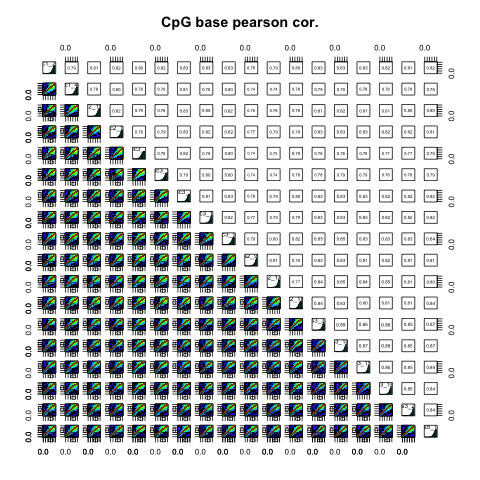

In [138]:
%R getCorrelation(meth, plot = T)

# Run clustering and PCA and plot results

/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The "ward" method has been renamed to "ward.D"; note new "ward.D2"

  warnings.warn(x, RRuntimeWarning)


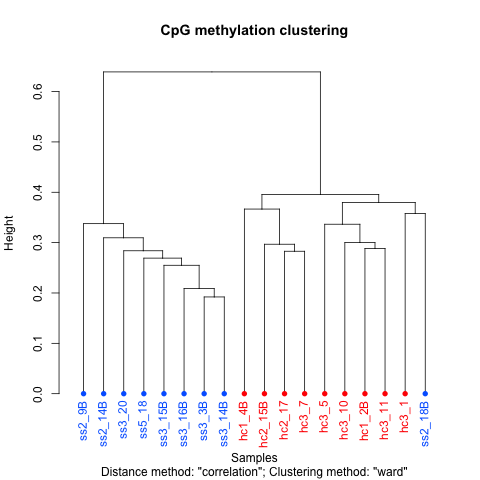

/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in hclust(d = d, method = HCLUST.METHODS[hclust.method]) : 
  object 'HCLUST.METHODS' not found

  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 'read' is deprecated.
Use 'methRead' instead.
See help("Deprecated") 

  warnings.warn(x, RRuntimeWarning)


R object with classes: ('hclust',) mapped to:
<ListVector - Python:0x118b5b208 / R:0x128f6caf0>
[Matrix, Float..., IntVe..., ..., StrVe..., Vector, StrVe...]
  merge: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x118b593c8 / R:0x1041e1620>
[     -13,      -16,      -15, ...,       13,       15,       16]
  height: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x118b5e0c8 / R:0x1041935e0>
[0.192126, 0.208912, 0.255017, ..., 0.379897, 0.395662, 0.639027]
  order: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x118b5ed48 / R:0x11eaa6200>
[      10,       11,       17, ...,        9,        5,       12]
  ...
  merge: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x118b48488 / R:0x12b478218>
['ward.D']
  height: <class 'rpy2.robjects

In [115]:
#cluster samples by methylation similarity
%R hc<- clusterSamples(meth, dist="correlation", method="ward", plot=T)

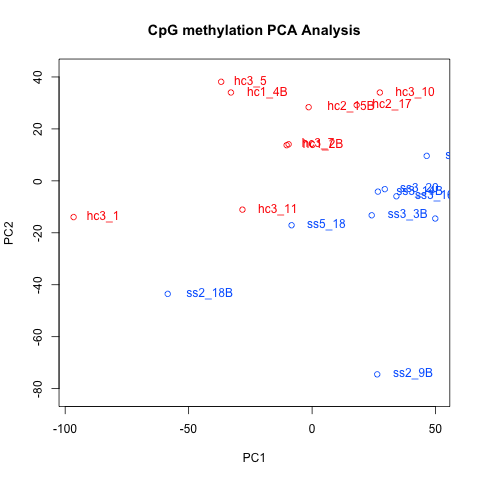

In [116]:
# Run PCA using prcomp function using percent methylation matrix as an input
%R PCA<-PCASamples(meth, scale=T, center=T)

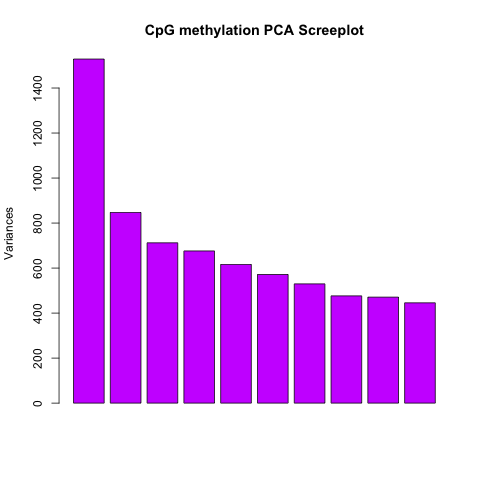

In [117]:
# Run PCA using prcomp function using percent methylation matrix as an input
%R PCA<-PCASamples(meth, scale=T, center=T, screeplot=T)

In [118]:
#Determin Population-specific DMLs
#note that file.list was defined in prior section
%R DMLobj <- read(file.list,sample.id,assembly="v9",treatment=treatment, context="CpG")


R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x108ab4d48 / R:0x10628b070>
[ListV..., ListV..., ListV..., ..., ListV..., ListV..., ListV...]
R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x108ab4d48 / R:0x10628b070>
[ListV..., ListV..., ListV..., ..., ListV..., ListV..., ListV...]
R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x108ab4d48 / R:0x10628b070>
[ListV..., ListV..., ListV..., ..., ListV..., ListV..., ListV...]
R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x108ab4d48 / R:0x10628b070>
[ListV..., ListV..., ListV..., ..., ListV..., ListV..., ListV...]
  ...
R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x108ab4d48 / R:0x10628b070>
[ListV..., ListV..., ListV..., ..., ListV..., ListV..., ListV...]
R object with classes: ('methylRawList',) mapped to:
<ListVector - Python:0x108ab4d48 / R:0x10628b070>
[ListV..., ListV..., ListV..., ..., ListV..., 

### Unite methylRawList and methylRawListDB objects such that only bases with coverage from all samples are retained

In [119]:
%R lin<-unite(DMLobj)

R object with classes: ('methylBase',) mapped to:
<ListVector - Python:0x108ab42c8 / R:0x1387487f0>
[Facto..., IntVe..., IntVe..., ..., IntVe..., Float..., Float...]
  chr: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('factor',) mapped to:
<FactorVector - Python:0x118b51888 / R:0x14680fa00>
[       1,        1,        1, ...,     2597,     2597,     2597]
  start: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x108ab27c8 / R:0x146822000>
[    5197,     5309,     5322, ...,     4792,     4800,     4805]
  end: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x108ab2c88 / R:0x146834600>
[    5197,     5309,     5322, ...,     4792,     4800,     4805]
  ...
  chr: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x108ab14c8 / R:0x146991800>
[      21,      103,       96, ...,

### Pool replicates within groups to a single sample per group - sums up coverage, numCs and numTs values within each group so one representative sample for each group will be created in a new methylBase object

In [120]:
%R lin.pooled <- pool(lin, sample.ids <- c("HC", "SS"))

R object with classes: ('methylBase',) mapped to:
<ListVector - Python:0x108ab2cc8 / R:0x12b967758>
[Facto..., IntVe..., IntVe..., ..., Float..., Float..., Float...]
  chr: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('factor',) mapped to:
<FactorVector - Python:0x118b5ed88 / R:0x14680fa00>
[       1,        1,        1, ...,     2597,     2597,     2597]
  start: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x118b5eb08 / R:0x146822000>
[    5197,     5309,     5322, ...,     4792,     4800,     4805]
  end: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x118b5b6c8 / R:0x146834600>
[    5197,     5309,     5322, ...,     4792,     4800,     4805]
  ...
  chr: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x118b62108 / R:0x136fd4000>
[188.000000, 1337.000000, 1164.

 ### Calculate differential methylation statistics between two groups of samples. 

In [121]:
%R lin_DML.fisher <- calculateDiffMeth(lin.pooled, adjust="bonferroni", effect="mean", test = "F")

R object with classes: ('methylDiff',) mapped to:
<ListVector - Python:0x118b5fe48 / R:0x146b823a8>
[Facto..., IntVe..., IntVe..., ..., Float..., Float..., Float...]
  chr: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('factor',) mapped to:
<FactorVector - Python:0x118b66a08 / R:0x14680fa00>
[       1,        1,        1, ...,     2597,     2597,     2597]
  start: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x118b66e08 / R:0x146822000>
[    5197,     5309,     5322, ...,     4792,     4800,     4805]
  end: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x108ab4088 / R:0x146834600>
[    5197,     5309,     5322, ...,     4792,     4800,     4805]
  ...
  chr: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x108ab1308 / R:0x13797b000>
[1.000000, 0.048916, 0.184852, 

### Hypermethylated DMLs

In [147]:
%R myDiff25p.hyper <- get.methylDiff(lin_DML.fisher, difference = 25, qvalue = 0.01, type = "hyper")

R object with classes: ('methylDiff',) mapped to:
<ListVector - Python:0x13beab3c8 / R:0x11fb65a70>
[Facto..., IntVe..., IntVe..., ..., Float..., Float..., Float...]
  chr: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('factor',) mapped to:
<FactorVector - Python:0x13beab388 / R:0x13ad0d310>
[      76,      125,      163, ...,     2442,     2446,     2464]
  start: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x13beb3208 / R:0x13ad0d4b0>
[    7246,    11340,      684, ...,    15505,     6792,     2665]
  end: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x13beb3848 / R:0x13ad0d650>
[    7246,    11340,      684, ...,    15505,     6792,     2665]
  ...
  chr: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x13beb3c88 / R:0x13ad0d990>
[0.000000, 0.000000, 0.000000, 

In [148]:
%R hyper.DML <- getData(myDiff25p.hyper)

,chr,start,end,strand,pvalue,qvalue,meth.diff
466,scaffold101806,7246,7246,+,7.040881e-14,1.317419e-09,27.564606
831,scaffold103004,11340,11340,+,8.634520e-27,1.615605e-22,31.362275
1340,scaffold104068,684,684,+,1.943320e-25,3.636147e-21,35.004595
1353,scaffold104068,1034,1034,+,1.113061e-33,2.082648e-29,36.449028
3174,scaffold1122,5327,5327,+,3.589632e-17,6.716561e-13,28.239911
3333,scaffold112927,130,130,+,1.883907e-37,3.524978e-33,25.948622
3365,scaffold113060,3029,3029,+,1.483188e-14,2.775193e-10,30.899645
3488,scaffold11339,5412,5412,+,2.316917e-34,4.335183e-30,43.470452
5022,scaffold120969,9259,9259,+,1.226190e-27,2.294324e-23,33.029722
5685,scaffold123048,10215,10215,+,2.836073e-08,5.306576e-04,26.442859


### Hypomethylated

In [149]:
%R myDiff25p.hypo <- get.methylDiff(lin_DML.fisher, difference = 25, qvalue = 0.01, type = "hypo")

R object with classes: ('methylDiff',) mapped to:
<ListVector - Python:0x13beaf848 / R:0x1234e7c08>
[Facto..., IntVe..., IntVe..., ..., Float..., Float..., Float...]
  chr: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('factor',) mapped to:
<FactorVector - Python:0x13be9ddc8 / R:0x1041807d0>
[      95,      161,      161, ...,     2591,     2591,     2591]
  start: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x13bea7ac8 / R:0x1041a6790>
[    2069,     1285,     1287, ...,     2576,     2672,     2751]
  end: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x13bea7d08 / R:0x1041aad80>
[    2069,     1285,     1287, ...,     2576,     2672,     2751]
  ...
  chr: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x13bea1f08 / R:0x11a816ca0>
[0.000000, 0.000000, 0.000000, 

In [150]:
%R hypo.DML <- getData(myDiff25p.hypo)

,chr,start,end,strand,pvalue,qvalue,meth.diff
610,scaffold102276,2069,2069,+,1.916207e-128,3.585415e-124,-70.437833
1303,scaffold104039,1285,1285,+,1.909525e-11,3.572912e-07,-28.184228
1304,scaffold104039,1287,1287,+,8.555115e-25,1.600747e-20,-44.677984
1331,scaffold104039,6807,6807,+,1.633970e-19,3.057321e-15,-29.087624
1871,scaffold106104,4071,4071,+,6.357753e-18,1.189599e-13,-31.336944
1954,scaffold106754,6599,6599,+,1.136915e-13,2.127282e-09,-33.570782
2149,scaffold107520,5788,5788,+,5.424145e-38,1.014912e-33,-39.344894
3173,scaffold1122,5324,5324,+,1.751807e-23,3.277806e-19,-31.671554
5169,scaffold121318,12121,12121,+,1.530287e-09,2.863320e-05,-29.296940
5924,scaffold124112,8403,8403,+,4.314653e-31,8.073147e-27,-30.808805


### Retrieve the table containing methylation information from methylKit Objects

In [152]:
%R lin_DML_p <- getData(lin_DML.fisher)

,chr,start,end,strand,pvalue,qvalue,meth.diff
1,scaffold100027,5197,5197,+,1.000000e+00,1.000000e+00,-0.230084
2,scaffold100027,5309,5309,+,4.891565e-02,1.000000e+00,4.219575
3,scaffold100027,5322,5322,+,1.848519e-01,1.000000e+00,3.065070
4,scaffold100027,5345,5345,+,2.581944e-01,1.000000e+00,-3.151614
5,scaffold100060,886,886,+,6.000727e-01,1.000000e+00,-1.759259
6,scaffold100060,902,902,+,6.456565e-01,1.000000e+00,-1.165832
7,scaffold100060,2260,2260,+,3.537993e-01,1.000000e+00,3.470073
8,scaffold100060,2305,2305,+,7.315901e-01,1.000000e+00,-1.123350
9,scaffold100060,10975,10975,+,1.000000e+00,1.000000e+00,-0.039040
10,scaffold100060,10986,10986,+,2.809525e-01,1.000000e+00,2.321535


### Filter DML by p value less than 0.01 and methylation difference >25

In [196]:
%R lin_DML_filt <- get.methylDiff(lin_DML.fisher, difference = 25, qvalue = 0.01)

R object with classes: ('methylDiff',) mapped to:
<ListVector - Python:0x19471ca88 / R:0x13f8472f0>
[Facto..., IntVe..., IntVe..., ..., Float..., Float..., Float...]
  chr: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('factor',) mapped to:
<FactorVector - Python:0x19471c2c8 / R:0x13b06f710>
[      76,       95,      125, ...,     2591,     2591,     2591]
  start: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x19470e908 / R:0x13b06f9d0>
[    7246,     2069,    11340, ...,     2576,     2672,     2751]
  end: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x1945f48c8 / R:0x13b06fc90>
[    7246,     2069,    11340, ...,     2576,     2672,     2751]
  ...
  chr: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1945f4908 / R:0x13b070210>
[0.000000, 0.000000, 0.000000, 

### write out csv file of filtered DMLs

In [197]:
%R write.csv(lin_DML_filt,file="lin_DML_filt")

# Look at DML file

In [219]:
!less lin_DML_filt

"","chr","start","end","strand","pvalue","qvalue","meth.diff"
"466","scaffold101806",7246,7246,"+",7.04088102275965e-14,1.31741924816856e-09,2 7.5646059394632
"610","scaffold102276",2069,2069,"+",1.91620706764425e-128,3.58541504426915e-124 ,-70.4378325594372
"831","scaffold103004",11340,11340,"+",8.63451980164722e-27,1.61560500008621e-22 ,31.3622754491018
"1303","scaffold104039",1285,1285,"+",1.90952490828303e-11,3.57291205588838e-07, -28.1842284011481
"1304","scaffold104039",1287,1287,"+",8.55511463163242e-25,1.60074749872474e-20, -44.677983598096
"1331","scaffold104039",6807,6807,"+",1.63396988372268e-19,3.0573210494335e-15,- 29.0876242095754
"1340","scaffold104068",684,684,"+",1.94332036308846e-25,3.63614673137483e-21,35 .0045952457836
"1353","scaffold104068",1034,1034,"+",1.11306085630539e-33,2.08264816823301e-29, 36.4490279231151
"1871","scaffold106104",4071,4071,"+",6.35775256395541e-18,1.1895990822417e-13,- 31.3369438249973
"1954","scaffold106754",6599,6599,"+",1.136915

# Determine genomic location of DMLs
* created a bed file with scaffold, start position, end position
output lines starting at the second, print columns 2,3,4 and DML_lin, remove ",  remove t,  output file

In [220]:
!tail -n +2 lin_DML_filt | awk -F, '{print $2, $3, $4, $5, "DML_lin" }' | tr -d '"' | tr ' ' "\t"  > lineage_dml.bed

In [221]:
!head lineage_dml.bed

scaffold101806	7246	7246	+	DML_lin
scaffold102276	2069	2069	+	DML_lin
scaffold103004	11340	11340	+	DML_lin
scaffold104039	1285	1285	+	DML_lin
scaffold104039	1287	1287	+	DML_lin
scaffold104039	6807	6807	+	DML_lin
scaffold104068	684	684	+	DML_lin
scaffold104068	1034	1034	+	DML_lin
scaffold106104	4071	4071	+	DML_lin
scaffold106754	6599	6599	+	DML_lin


In [262]:
!sort -k1,1 -k2,2n lineage_dml.bed > sorted_lineage_dml.bed

In [263]:
!head sorted_lineage_dml.bed

scaffold101806	7246	7246	+	DML_lin
scaffold102276	2069	2069	+	DML_lin
scaffold103004	11340	11340	+	DML_lin
scaffold104039	1285	1285	+	DML_lin
scaffold104039	1287	1287	+	DML_lin
scaffold104039	6807	6807	+	DML_lin
scaffold104068	684	684	+	DML_lin
scaffold104068	1034	1034	+	DML_lin
scaffold106104	4071	4071	+	DML_lin
scaffold106754	6599	6599	+	DML_lin


# Obtain Genome Track Info
https://github.com/sr320/student-fish546-2016

In [264]:
!curl -O https://raw.githubusercontent.com/sr320/student-fish546-2016/master/analyses/Olyv6_blastn-Scaff-30k.gff > Olyv6_blastn-Scaff-30k.gff

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3056k  100 3056k    0     0  3182k      0 --:--:-- --:--:-- --:--:-- 6530k


In [265]:
!head Olyv6_blastn-Scaff-30k.gff

scaffold70795	blastn:Ostrea-scaff-30k	blastn	47164	47017	2e-46	-	.	TR2|c0_g1_i1	
scaffold70795	blastn:Ostrea-scaff-30k	blastn	46514	46660	1e-42	+	.	TR2|c0_g1_i1	
scaffold25028	blastn:Ostrea-scaff-30k	blastn	6458	6337	1e-33	-	.	TR5|c0_g1_i1	
scaffold86430	blastn:Ostrea-scaff-30k	blastn	12966	12892	2e-21	-	.	TR7|c0_g1_i1	
scaffold3873	blastn:Ostrea-scaff-30k	blastn	29329	29092	1e-47	-	.	TR16|c0_g1_i1	
scaffold52557	blastn:Ostrea-scaff-30k	blastn	16379	16253	7e-32	-	.	TR28|c0_g1_i1	
scaffold40838	blastn:Ostrea-scaff-30k	blastn	2748	2527	2e-26	-	.	TR43|c0_g1_i1	
scaffold12565	blastn:Ostrea-scaff-30k	blastn	38995	39238	2e-69	+	.	TR66|c0_g1_i1	
scaffold12565	blastn:Ostrea-scaff-30k	blastn	38956	39238	1e-79	+	.	TR66|c0_g2_i1	
scaffold26204	blastn:Ostrea-scaff-30k	blastn	27355	27474	6e-23	+	.	TR74|c0_g1_i1	


In [266]:
!awk '{print $1,$4,$5,$7,$8,$2,$3,$9}' Olyv6_blastn-Scaff-30k.gff > reorder_Olyv6_blastn-Scaff-30k.gff

In [267]:
!head reorder_Olyv6_blastn-Scaff-30k.gff

scaffold70795 47164 47017 - . blastn:Ostrea-scaff-30k blastn TR2|c0_g1_i1
scaffold70795 46514 46660 + . blastn:Ostrea-scaff-30k blastn TR2|c0_g1_i1
scaffold25028 6458 6337 - . blastn:Ostrea-scaff-30k blastn TR5|c0_g1_i1
scaffold86430 12966 12892 - . blastn:Ostrea-scaff-30k blastn TR7|c0_g1_i1
scaffold3873 29329 29092 - . blastn:Ostrea-scaff-30k blastn TR16|c0_g1_i1
scaffold52557 16379 16253 - . blastn:Ostrea-scaff-30k blastn TR28|c0_g1_i1
scaffold40838 2748 2527 - . blastn:Ostrea-scaff-30k blastn TR43|c0_g1_i1
scaffold12565 38995 39238 + . blastn:Ostrea-scaff-30k blastn TR66|c0_g1_i1
scaffold12565 38956 39238 + . blastn:Ostrea-scaff-30k blastn TR66|c0_g2_i1
scaffold26204 27355 27474 + . blastn:Ostrea-scaff-30k blastn TR74|c0_g1_i1


In [268]:
!sort -k1,1 -k2,2n reorder_Olyv6_blastn-Scaff-30k.gff > sorted_reorder_Olyv6_blastn-Scaff-30k.gff

In [269]:
!head sorted_reorder_Olyv6_blastn-Scaff-30k.gff

scaffold10022 561 145 - . blastn:Ostrea-scaff-30k blastn TR56197|c0_g1_i1
scaffold10022 598 520 - . blastn:Ostrea-scaff-30k blastn TR39301|c2_g1_i1
scaffold10022 610 523 - . blastn:Ostrea-scaff-30k blastn TR39301|c2_g1_i2
scaffold10022 901 1170 + . blastn:Ostrea-scaff-30k blastn TR25984|c0_g1_i3
scaffold10022 903 1170 + . blastn:Ostrea-scaff-30k blastn TR25984|c0_g1_i1
scaffold10022 903 1170 + . blastn:Ostrea-scaff-30k blastn TR25984|c0_g2_i1
scaffold10022 926 1170 + . blastn:Ostrea-scaff-30k blastn TR25984|c0_g1_i2
scaffold10022 1018 896 - . blastn:Ostrea-scaff-30k blastn TR39301|c2_g3_i2
scaffold10022 1018 896 - . blastn:Ostrea-scaff-30k blastn TR39301|c2_g3_i7
scaffold10022 1018 896 - . blastn:Ostrea-scaff-30k blastn TR39301|c2_g3_i9


# Determine overlap between the features in the DML and Track files

In [271]:
%%bash
/Applications/bedtools2/bin/intersectbed \
-sorted \
-u \
-a sorted_lineage_dml.bed \
-b sorted_reorder_Olyv6_blastn-Scaff-30k.gff  > intersect_DML_lin_u.txt

Error: Sorted input specified, but the file sorted_reorder_Olyv6_blastn-Scaff-30k.gff has the following out of order record
	scaffold10022 561 145 - . blastn:Ostrea-scaff-30k blastn TR56197|c0_g1_i1
